In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [278]:
postcovid = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
precovid = pd.read_csv('Crime_Data_from_2010_to_2019.csv')

In [279]:
postcovid.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [280]:
precovid.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


## Data Preprocessing

In [281]:
# Drop columns that are not needed
postcovid = postcovid.drop(columns = ['Part 1-2', 'Weapon Used Cd', 'Weapon Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street'])
precovid = precovid.drop(columns = ['Part 1-2', 'Weapon Used Cd', 'Weapon Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street'])

In [282]:
# Drop rows with NaN values in specified columns
postcovid = postcovid.dropna(subset=['Mocodes', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc'])
precovid = precovid.dropna(subset=['Mocodes', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc','Date Rptd','DATE OCC','Status'])

In [283]:
# table of columns and their descriptions
column_descriptions = [
    'Unique identifier for each crime incident',
    'Date when the crime incident was reported',
    'Date when the crime incident occurred',
    'Time when the crime incident occurred',
    'Area ID',
    'Area Name',
    'Reporting District ID',
    'Crime Code ID',
    'Crime Code Description',
    'MO Codes',
    'Victim Age',
    'Victim Sex',
    'Victim Descent',
    'Premise Code',
    'Premise Description',
    'Status Code',
    'Status Description',
    'Location',
    'Latitude',
    'Longitude'
]

columns_info_table = pd.DataFrame({
    "Data Type": postcovid.dtypes,
    "Null Count": postcovid.isna().sum(),
    'Description': column_descriptions
})

columns_info_table

,Data Type,Null Count,Description
DR_NO,int64,0,Unique identifier for each crime incident
Date Rptd,object,0,Date when the crime incident was reported
DATE OCC,object,0,Date when the crime incident occurred
TIME OCC,int64,0,Time when the crime incident occurred
AREA,int64,0,Area ID
AREA NAME,object,0,Area Name
Rpt Dist No,int64,0,Reporting District ID
Crm Cd,int64,0,Crime Code ID
Crm Cd Desc,object,0,Crime Code Description
Mocodes,object,0,MO Codes


In [284]:
# Convert date columns to datetime format
postcovid["Date Rptd"] = pd.to_datetime(postcovid["Date Rptd"], errors='coerce', format="%m/%d/%Y %I:%M:%S %p")
postcovid["DATE OCC"] = pd.to_datetime(postcovid["DATE OCC"], errors='coerce', format="%m/%d/%Y %I:%M:%S %p")

precovid["Date Rptd"] = pd.to_datetime(precovid["Date Rptd"], errors='coerce', format="%m/%d/%Y %I:%M:%S %p")
precovid["DATE OCC"] = pd.to_datetime(precovid["DATE OCC"], errors='coerce', format="%m/%d/%Y %I:%M:%S %p")

In [285]:
# Filtering Victim Age
postcovid = postcovid[(postcovid["Vict Age"] >= 14) & (postcovid["Vict Age"] <= 100)]
precovid = precovid[(precovid["Vict Age"] >= 14) & (precovid["Vict Age"] <= 100)]

In [286]:
# Convert columns to categorical
crime_code_columns1 = ["Crm Cd", "Crm Cd Desc", "Vict Sex", "Vict Descent", "Status", "Premis Desc"]
postcovid[crime_code_columns1] = postcovid[crime_code_columns1].astype("category")

crime_code_columns2 = ["Crm Cd", "Crm Cd Desc", "Vict Sex", "Vict Descent", "Status", "Premis Desc"]
precovid[crime_code_columns2] = precovid[crime_code_columns2].astype("category")

In [287]:
# Filter for dates between 2016 and 2019 for precovid
precovid = precovid[(precovid["Date Rptd"] >= '2016-01-01') & (precovid["Date Rptd"] <= '2019-12-31')]

In [288]:
postcovid.describe()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Vict Age,Premis Cd,LAT,LON
count,5.497990e+05,549799,549799,549799.000000,549799.000000,549799.000000,549799.000000,549799.000000,549799.000000,549799.000000
mean,2.145353e+08,2021-10-21 09:46:06.026856960,2021-10-10 18:20:58.404616960,1322.747675,10.667144,1113.060380,40.018492,332.231801,33.972162,-117.998750
min,1.030447e+07,2020-01-01 00:00:00,2020-01-01 00:00:00,1.000000,1.000000,101.000000,14.000000,101.000000,0.000000,-118.667600
25%,2.021090e+08,2020-12-17 00:00:00,2020-12-04 00:00:00,900.000000,5.000000,587.000000,28.000000,104.000000,34.014900,-118.432700
50%,2.118212e+08,2021-11-09 00:00:00,2021-10-28 00:00:00,1400.000000,11.000000,1132.000000,37.000000,403.000000,34.058700,-118.324400
75%,2.214097e+08,2022-08-29 00:00:00,2022-08-18 00:00:00,1845.000000,16.000000,1622.000000,50.000000,502.000000,34.164900,-118.274900
max,2.399097e+08,2023-06-19 00:00:00,2023-06-19 00:00:00,2359.000000,21.000000,2199.000000,99.000000,971.000000,34.334300,0.000000
std,1.014197e+07,NaN,NaN,653.161671,6.157904,615.521051,15.230774,216.627003,1.873293,6.496425


In [289]:
precovid.describe()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Vict Age,Premis Cd,LAT,LON
count,7.149920e+05,714992,714992,714992.000000,714992.000000,714992.000000,714992.000000,714992.000000,714992.000000,714992.000000
mean,1.760446e+08,2017-12-28 05:44:53.333631744,2017-12-07 07:03:34.330789888,1344.653455,10.914731,1138.012586,39.823646,320.895595,34.077394,-118.356411
min,2.030536e+07,2016-01-01 00:00:00,2010-01-01 00:00:00,1.000000,1.000000,100.000000,14.000000,101.000000,0.000000,-118.667700
25%,1.701067e+08,2017-01-02 00:00:00,2016-12-15 00:00:00,910.000000,6.000000,632.000000,27.000000,103.000000,34.014500,-118.436700
50%,1.721196e+08,2017-12-27 00:00:00,2017-12-11 00:00:00,1406.000000,11.000000,1158.000000,37.000000,242.000000,34.061500,-118.329400
75%,1.821121e+08,2018-12-19 00:00:00,2018-12-08 00:00:00,1900.000000,16.000000,1665.000000,51.000000,501.000000,34.172000,-118.277400
max,2.116067e+08,2019-12-31 00:00:00,2019-12-31 00:00:00,2359.000000,21.000000,2199.000000,99.000000,971.000000,34.329800,0.000000
std,1.111915e+07,NaN,NaN,649.897362,6.154172,615.264209,15.609284,213.129255,0.204303,0.603431


In [290]:
# number of observations for precovid
precovid.shape

(714992, 20)

In [291]:
# number of observations for postcovid
postcovid.shape

(549799, 20)

In [292]:
postcovid.isna().sum()

DR_NO           0
Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA            0
AREA NAME       0
Rpt Dist No     0
Crm Cd          0
Crm Cd Desc     0
Mocodes         0
Vict Age        0
Vict Sex        0
Vict Descent    0
Premis Cd       0
Premis Desc     0
Status          0
Status Desc     0
LOCATION        0
LAT             0
LON             0
dtype: int64

In [293]:
precovid.isna().sum()

DR_NO           0
Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA            0
AREA NAME       0
Rpt Dist No     0
Crm Cd          0
Crm Cd Desc     0
Mocodes         0
Vict Age        0
Vict Sex        0
Vict Descent    0
Premis Cd       0
Premis Desc     0
Status          0
Status Desc     0
LOCATION        0
LAT             0
LON             0
dtype: int64

In [294]:
postcovid.dtypes

DR_NO                    int64
Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
TIME OCC                 int64
AREA                     int64
AREA NAME               object
Rpt Dist No              int64
Crm Cd                category
Crm Cd Desc           category
Mocodes                 object
Vict Age                 int64
Vict Sex              category
Vict Descent          category
Premis Cd              float64
Premis Desc           category
Status                category
Status Desc             object
LOCATION                object
LAT                    float64
LON                    float64
dtype: object

In [295]:
precovid.dtypes

DR_NO                    int64
Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
TIME OCC                 int64
AREA                     int64
AREA NAME               object
Rpt Dist No              int64
Crm Cd                category
Crm Cd Desc           category
Mocodes                 object
Vict Age                 int64
Vict Sex              category
Vict Descent          category
Premis Cd              float64
Premis Desc           category
Status                category
Status Desc             object
LOCATION                object
LAT                    float64
LON                    float64
dtype: object

## Data Exploration

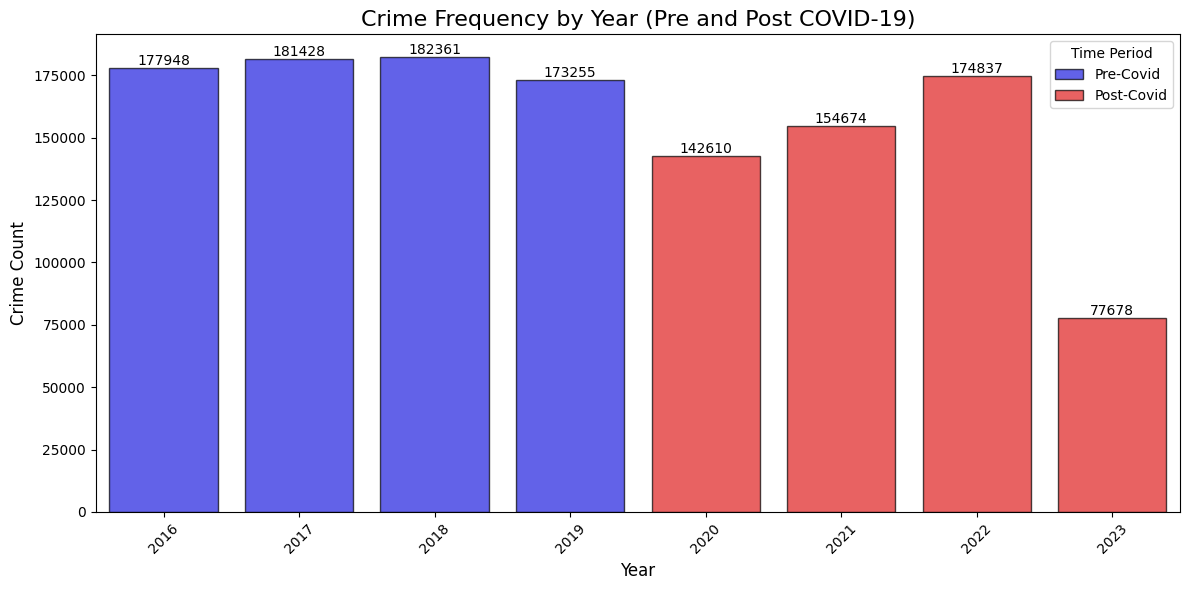

In [301]:
# bar chart for crime frequency by year
precovid['Year'] = precovid['Date Rptd'].dt.year
postcovid['Year'] = postcovid['Date Rptd'].dt.year

plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=precovid, color='blue', label='Pre-Covid', alpha=0.7, edgecolor='black')
sns.countplot(x='Year', data=postcovid, color='red', label='Post-Covid', alpha=0.7, edgecolor='black')

for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().text(p.get_x() + p.get_width() / 2., height + 10, int(height), ha="center", va="bottom", fontsize=10)

plt.title('Crime Frequency by Year (Pre and Post COVID-19)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crime Count', fontsize=12)
plt.legend(title="Time Period", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

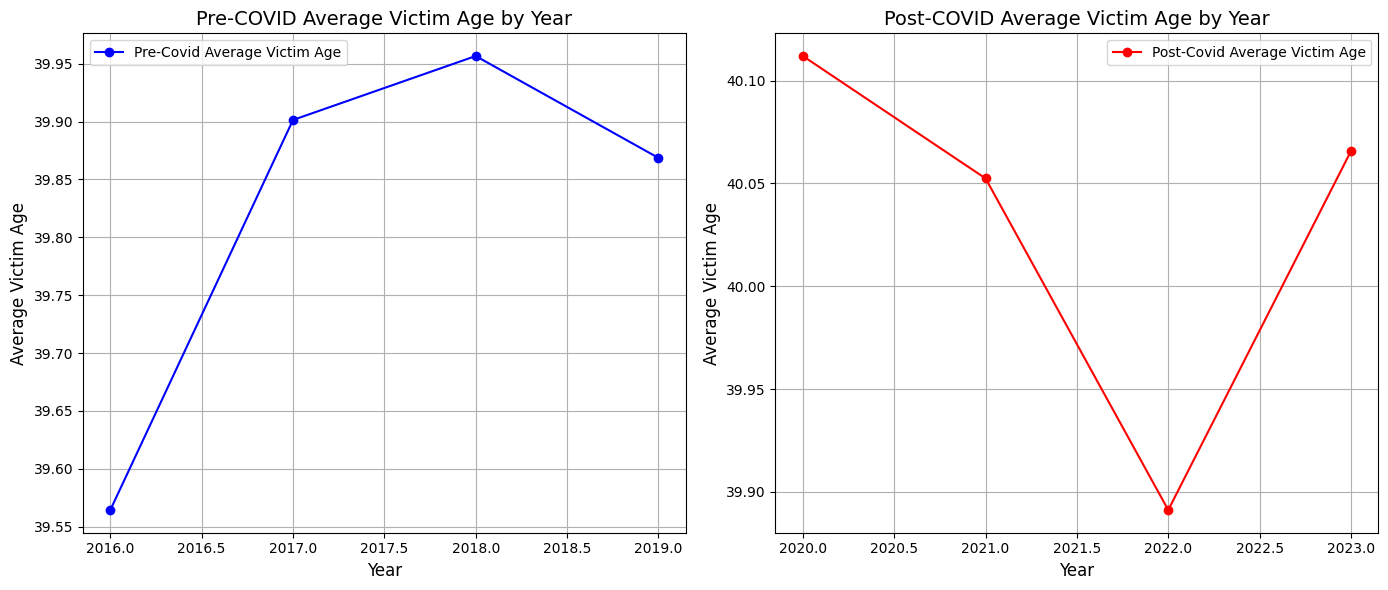

In [302]:
# average age of victims for both pre-pandemic and post-pandemic data
precovid_avg_age = precovid.groupby('Year')['Vict Age'].mean()
postcovid_avg_age = postcovid.groupby('Year')['Vict Age'].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(precovid_avg_age.index, precovid_avg_age, label='Pre-Covid Average Victim Age', color='blue', marker='o')
axes[0].set_title('Pre-COVID Average Victim Age by Year', fontsize=14)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Average Victim Age', fontsize=12)
axes[0].legend()
axes[0].grid(True)

axes[1].plot(postcovid_avg_age.index, postcovid_avg_age, label='Post-Covid Average Victim Age', color='red', marker='o')
axes[1].set_title('Post-COVID Average Victim Age by Year', fontsize=14)
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Average Victim Age', fontsize=12)
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

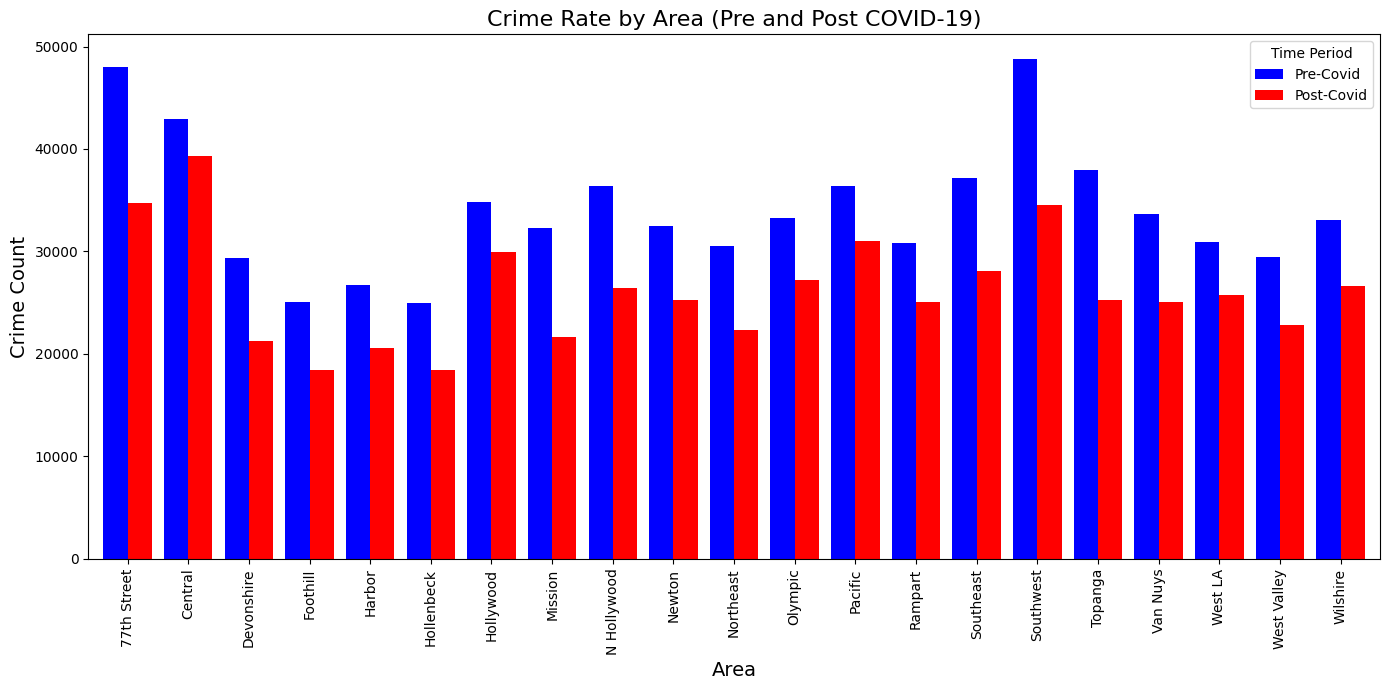

In [303]:
# crime rate by area
precovid_area = precovid.groupby('AREA NAME').size().sort_values(ascending=False)
postcovid_area = postcovid.groupby('AREA NAME').size().sort_values(ascending=False)

area_data = pd.DataFrame({
    'Pre-Covid': precovid_area,
    'Post-Covid': postcovid_area
}).fillna(0)

plt.figure(figsize=(14, 7))
area_data.plot(kind='bar', width=0.8, color=['blue', 'red'], ax=plt.gca())

plt.title('Crime Rate by Area (Pre and Post COVID-19)', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Crime Count', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title="Time Period")
plt.tight_layout()
plt.show()

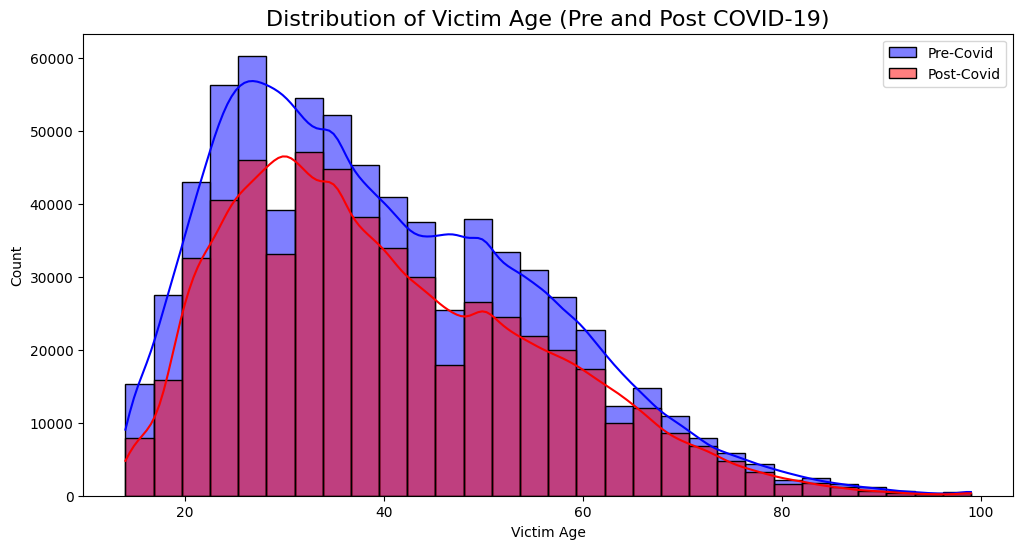

In [304]:
# plot distribution of victim age for pre-covid and post-covid
plt.figure(figsize=(12, 6))
sns.histplot(precovid['Vict Age'], kde=True, color='blue', label='Pre-Covid', bins=30)
sns.histplot(postcovid['Vict Age'], kde=True, color='red', label='Post-Covid', bins=30)
plt.title('Distribution of Victim Age (Pre and Post COVID-19)', fontsize=16)
plt.xlabel('Victim Age')
plt.ylabel('Count')
plt.legend()
plt.show()

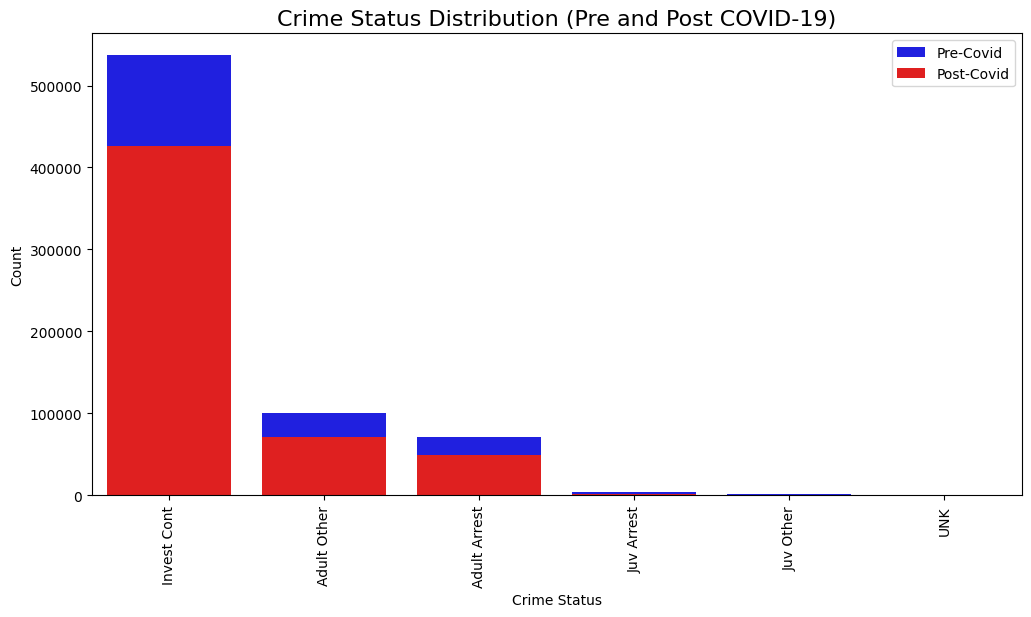

In [305]:
# crime status distribution for pre-covid and post-covid
precovid_status_count = precovid['Status Desc'].value_counts()
postcovid_status_count = postcovid['Status Desc'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=precovid_status_count.index, y=precovid_status_count.values, color='blue', label='Pre-Covid')
sns.barplot(x=postcovid_status_count.index, y=postcovid_status_count.values, color='red', label='Post-Covid')
plt.title('Crime Status Distribution (Pre and Post COVID-19)', fontsize=16)
plt.xlabel('Crime Status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend()
plt.show()